In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import warnings
from sklearn.datasets import load_wine
warnings.filterwarnings("ignore")

# LOAD DATASET

In [2]:
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# EXPLORATORY DATA ANALYSIS

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
data=pd.DataFrame(data=wine.data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
data['target']=wine.target
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
data.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
target      int32
dtype: object

In [10]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
target    0
dtype: int64

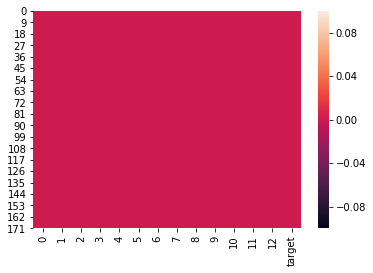

In [11]:
sns.heatmap(data.isnull())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282CC95D208>,
      dtype=object)

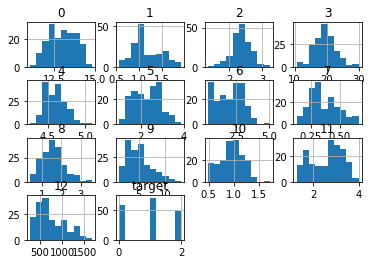

In [56]:
data.hist()

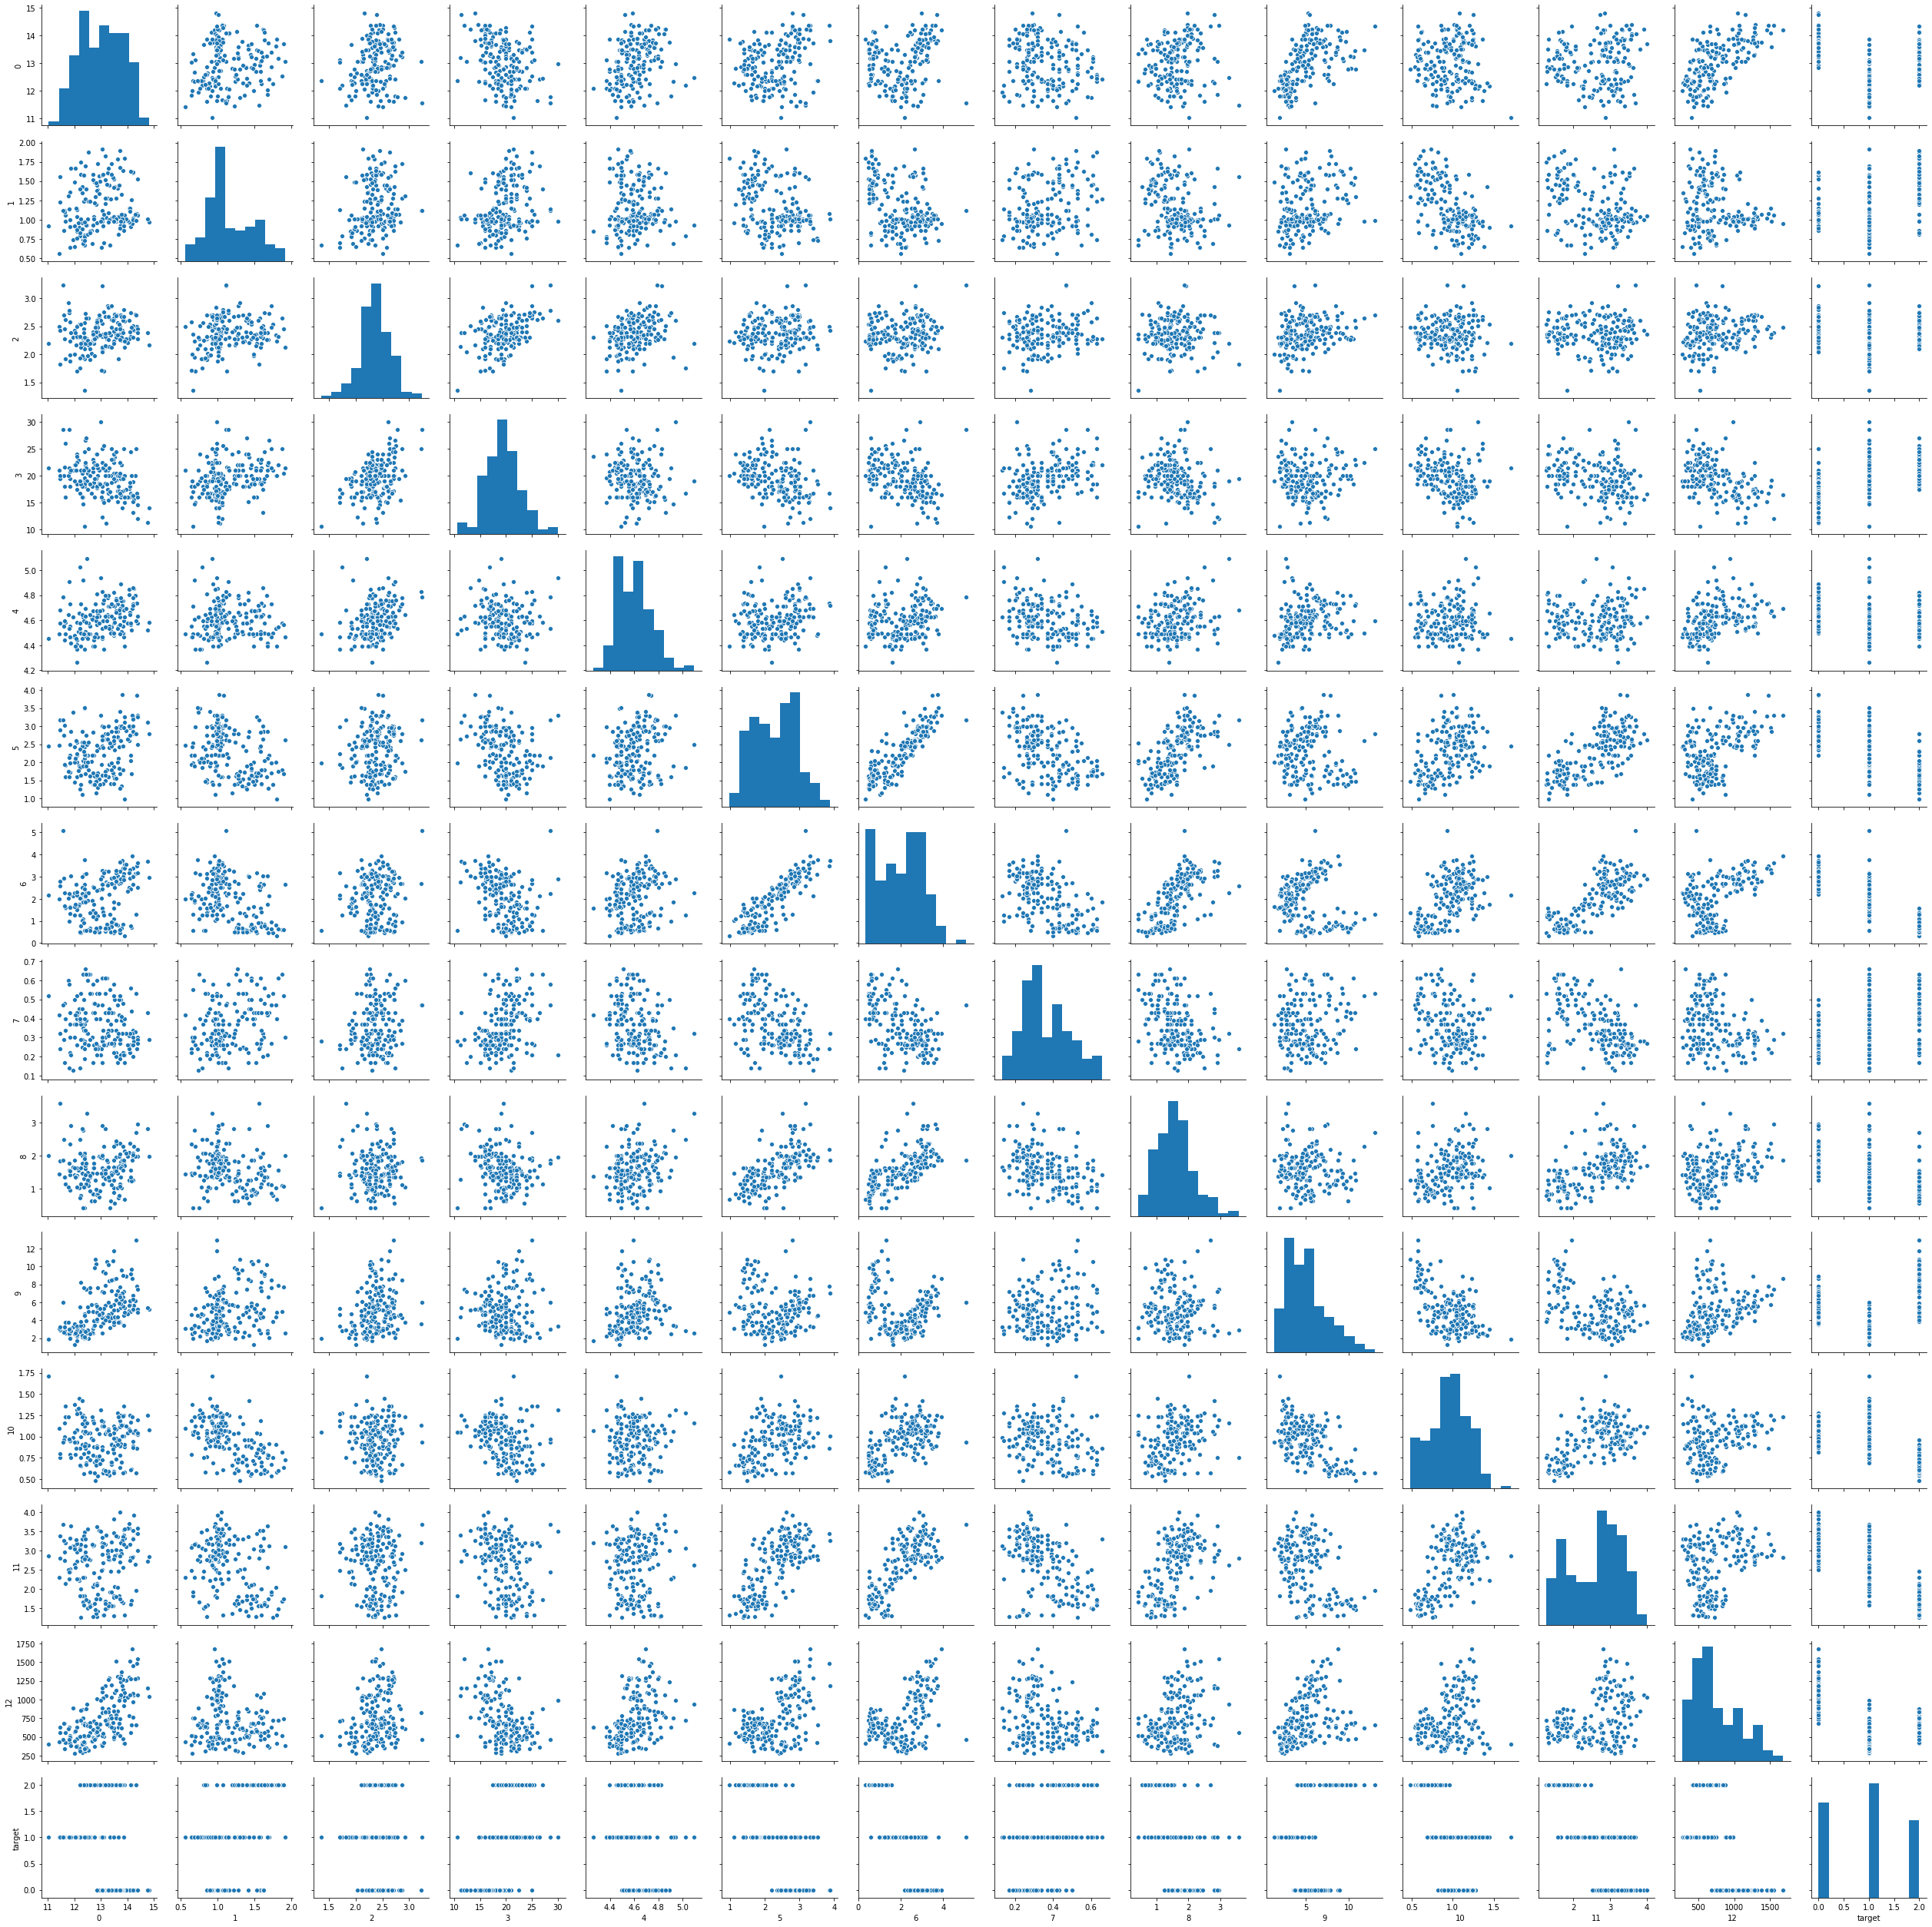

In [57]:
sns.pairplot(data)

In [12]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [13]:
data.skew()

0        -0.051482
1         1.039651
2        -0.176699
3         0.213047
4         1.098191
5         0.086639
6         0.025344
7         0.450151
8         0.517137
9         0.868585
10        0.021091
11       -0.307285
12        0.767822
target    0.107431
dtype: float64

In [14]:
data[1]=np.log1p(data[1])
data.skew()

0        -0.051482
1         0.529222
2        -0.176699
3         0.213047
4         1.098191
5         0.086639
6         0.025344
7         0.450151
8         0.517137
9         0.868585
10        0.021091
11       -0.307285
12        0.767822
target    0.107431
dtype: float64

In [15]:
data[4]=np.log1p(data[4])
data.skew()

0        -0.051482
1         0.529222
2        -0.176699
3         0.213047
4         0.605723
5         0.086639
6         0.025344
7         0.450151
8         0.517137
9         0.868585
10        0.021091
11       -0.307285
12        0.767822
target    0.107431
dtype: float64

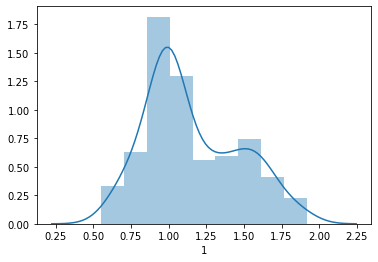

In [16]:
sns.distplot(data[1])

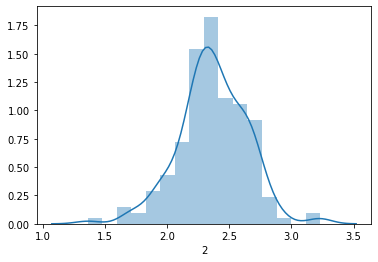

In [17]:
sns.distplot(data[2])

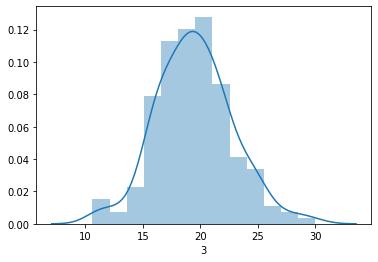

In [18]:
sns.distplot(data[3])

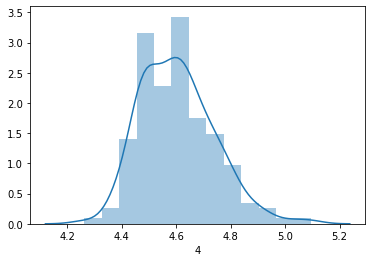

In [19]:
sns.distplot(data[4])

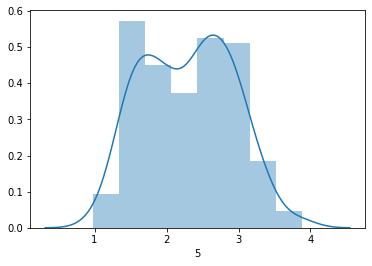

In [20]:
sns.distplot(data[5])

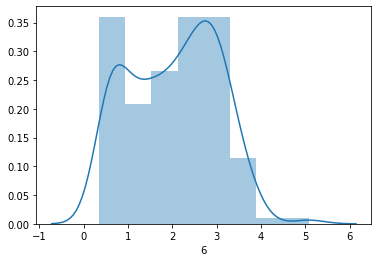

In [21]:
sns.distplot(data[6])

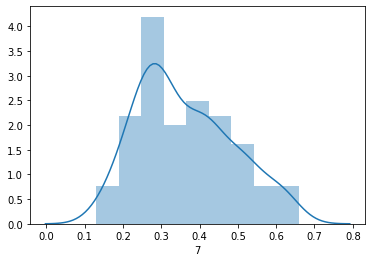

In [22]:
sns.distplot(data[7])

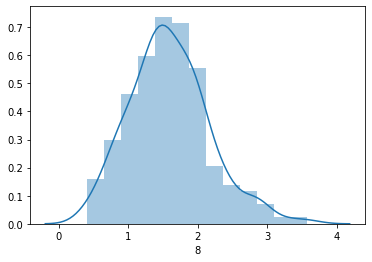

In [23]:
sns.distplot(data[8])

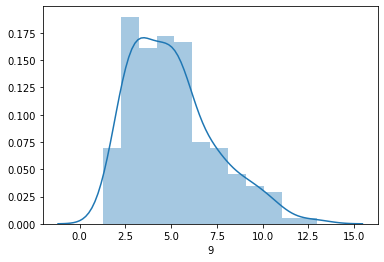

In [24]:
sns.distplot(data[9])

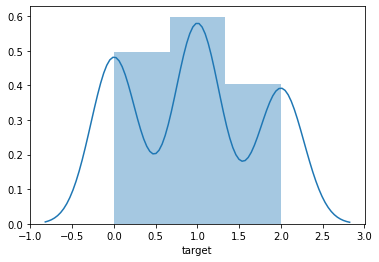

In [25]:
sns.distplot(data['target'])

In [26]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,0.116901,0.211545,-0.310235,0.298318,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.116901,1.000000,0.205229,0.294100,-0.009208,-0.330602,-0.392436,0.287910,-0.213087,0.276331,-0.567619,-0.351980,-0.157129,0.416223
2,0.211545,0.205229,1.000000,0.443367,0.312469,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.294100,0.443367,1.000000,-0.093037,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.298318,-0.009208,0.312469,-0.093037,1.000000,0.225544,0.203390,-0.254293,0.220277,0.230516,0.041877,0.057683,0.416753,-0.218132
5,0.289101,-0.330602,0.128980,-0.321113,0.225544,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.392436,0.115077,-0.351370,0.203390,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.287910,0.186230,0.361922,-0.254293,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.213087,0.009652,-0.197327,0.220277,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.276331,0.258887,0.018732,0.230516,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


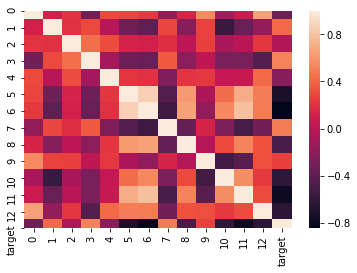

In [27]:
sns.heatmap(data.corr())

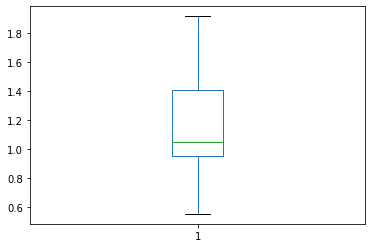

In [28]:
#Checking outliers
data[1].plot.box()

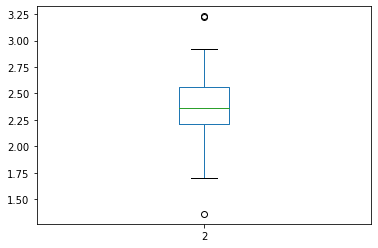

In [29]:
data[2].plot.box()

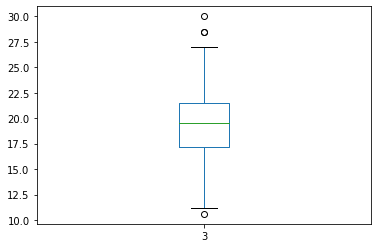

In [30]:
data[3].plot.box()

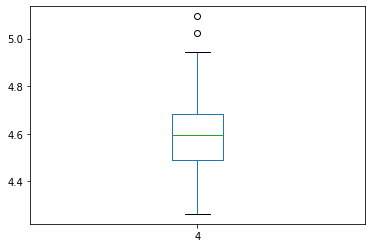

In [31]:
data[4].plot.box()

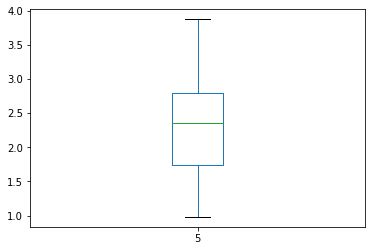

In [32]:
data[5].plot.box()

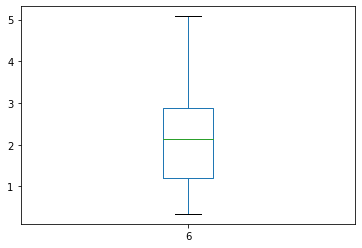

In [33]:
data[6].plot.box()

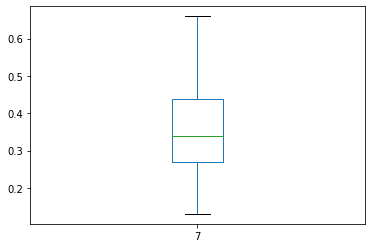

In [34]:
data[7].plot.box()

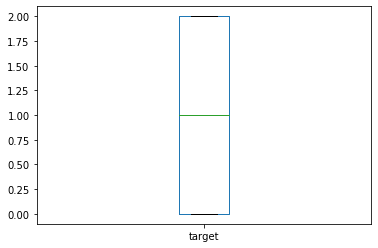

In [35]:
data['target'].plot.box()

In [36]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.51861254, 0.51181037, 0.23205254, ..., 1.84791957, 1.01300893,
        1.21394365],
       [0.24628963, 0.42920147, 0.82799632, ..., 1.1134493 , 0.96524152,
        1.21394365],
       [0.19687903, 0.1846086 , 1.10933436, ..., 0.78858745, 1.39514818,
        1.21394365],
       ...,
       [0.33275817, 1.64871201, 0.38935541, ..., 1.48544548, 0.28057537,
        1.37386437],
       [0.20923168, 0.39908488, 0.01273209, ..., 1.40069891, 0.29649784,
        1.37386437],
       [1.39508604, 1.536356  , 1.36520822, ..., 1.42894777, 0.59516041,
        1.37386437]])

In [37]:
threshold=3
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 158], dtype=int64), array([ 2,  2,  4,  3,  4,  8, 10,  2,  6,  9], dtype=int64))


In [38]:
data_new=data[(z<3).all(axis=1)]
data_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.894617,2.45,20.5,4.564348,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,1.591274,2.48,23.0,4.634729,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,1.663926,2.26,20.0,4.795791,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,1.278152,2.37,20.0,4.795791,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [39]:
data.shape

(178, 14)

In [40]:
data_new.shape

(169, 14)

# Split the data into x and y

In [41]:
x=data_new.drop('target',axis=1)
y=data_new['target']

In [42]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

# APPLYING ALGORITHMS

In [43]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=0)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(133, 13)
(133,)
(36, 13)
(36,)


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.959524 (0.066539)
KNC: 0.702143 (0.094013)
CART: 0.891429 (0.093260)
NB: 0.975000 (0.038188)
SVM: 0.510476 (0.103926)


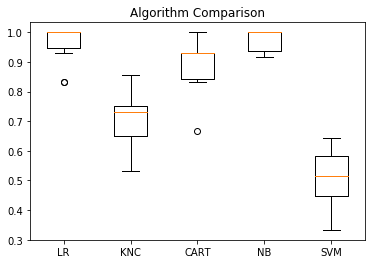

In [47]:
# Test Options and Evaluation Metrics
num_folds = 10
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=20)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)
    # Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [48]:
#Now we make prediction on best accurate model
# Make predictions on validation dataset
Nb=GaussianNB()
Nb.fit(x_train, y_train)
predNb = Nb.predict(x_test)
# Evaluate predictions
print(accuracy_score(y_test, predNb))
print(confusion_matrix(y_test, predNb))
print(classification_report(y_test, predNb))

1.0
[[12  0  0]
 [ 0 13  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# UNSUPERVISED LEARNING

In [49]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(x)

In [50]:
kModel.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2])

In [51]:
kModel.cluster_centers_

array([[1.29223729e+01, 1.21954243e+00, 2.40745763e+00, 1.98542373e+01,
        4.62161759e+00, 2.09203390e+00, 1.54694915e+00, 3.92372881e-01,
        1.41728814e+00, 5.64762712e+00, 8.73830508e-01, 2.33813559e+00,
        7.22067797e+02],
       [1.38221739e+01, 1.04692750e+00, 2.42239130e+00, 1.67413043e+01,
        4.65705826e+00, 2.85782609e+00, 3.01695652e+00, 2.86956522e-01,
        1.90934783e+00, 5.75369565e+00, 1.07326087e+00, 3.10565217e+00,
        1.19971739e+03],
       [1.25685937e+01, 1.19412696e+00, 2.29203125e+00, 2.08234375e+01,
        4.52460537e+00, 2.02750000e+00, 1.72390625e+00, 3.88750000e-01,
        1.42953125e+00, 4.13015623e+00, 9.31406250e-01, 2.47687500e+00,
        4.54281250e+02]])

In [52]:
import pandas as pd
pd.crosstab(y,kModel.labels_)

col_0,0,1,2
target,,,
0,12,46,0
1,18,0,46
2,29,0,18


In [53]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kModel.labels_,y))

0.46291953517069556


In [55]:
#Save the model
from sklearn.externals import joblib
joblib.dump(Nb,"wine.pkl")

['wine.pkl']